A Company has its offices across all locations of India. These locations are categorized with respect to zones.  The company has decided to give medical expenditure benefits to their employees.  The company has collected the medical expenditure of all the employees for the year 2019.  The company also collected some other health and family related data of all employees like number of dependents, age, bmi, smoking and alcoholic habits.
 Answer the following questions to provide insight into the collected data.
Dataset details ** 
id: Employee id - unique
age: age of primary beneficiary
sex: Gender data - female, male
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
dependent: Number of children other family members who are not earning and dependent on employees.
alcohol: Alcohol consumption habit. Possible values - daily, weekend, party, no, rarely
smoker: Smoking habit.
zone: The office location zones. Possible values - east, west, south, north, northeast, southeast, southwest, northwest.
expenditure: Individual medical expenditure by employees during year 2019

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
import warnings
warnings.filterwarnings(action = 'ignore')

In [5]:
 # Read the dataset and do primary study of data

In [6]:
df_emp_health = pd.read_csv('emp_health.csv')

In [7]:
# a. Reading some rows of dataset

In [8]:
df_emp_health.sample(5)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
29,i10041,31,male,36.300,2,daily,yes,southwest,38711.00000
656,i10668,26,female,42.400,1,daily,no,west,3410.32400
511,i10523,27,male,33.660,0,weekend,no,southeast,2498.41440
618,i10630,19,female,33.110,0,no,yes,east,34439.85590
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061


In [9]:
# b. Learn data types of all features

In [10]:
df_emp_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1338 non-null   object 
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   dependent    1338 non-null   int64  
 5   alcohol      1338 non-null   object 
 6   smoke        1338 non-null   object 
 7   zone         1338 non-null   object 
 8   expenditure  1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [11]:
# c. See the statistical properties of the data.

In [12]:
df_emp_health.describe()

,age,bmi,dependent,expenditure
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
# 1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [14]:
print('The average expenditure on health management of employees above 50 that smoke is:', 
     round(df_emp_health[(df_emp_health['age'] > 50) & (df_emp_health['smoke'] == 'yes')]['expenditure'].mean()))

The average expenditure on health management of employees above 50 that smoke is: 38820


In [15]:
# 2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [16]:
print('The number of female employees that did not consume alcohol daily is:', 
      df_emp_health[(df_emp_health['sex'] == 'female') & (df_emp_health['alcohol'] != 'daily')]['id'].count())
print('The total number of female employees is:', df_emp_health[df_emp_health['sex'] == 'female']['id'].count())
print('The proportion of the female employees that did not consume alcohol daily to the total number of female employees is:', 
     round(df_emp_health[(df_emp_health['sex'] == 'female') & (df_emp_health['alcohol'] != 'daily')]['id'].count()/df_emp_health[df_emp_health['sex'] == 'female']['id'].count(), 2))

The number of female employees that did not consume alcohol daily is: 453
The total number of female employees is: 662
The proportion of the female employees that did not consume alcohol daily to the total number of female employees is: 0.68


In [17]:
# 3. Display zone wise average expenditure of employees on health

In [18]:
print('The zone-wise average expenditure of employees on health is:','\n', 
      round(df_emp_health.groupby('zone')['expenditure'].mean()))

The zone-wise average expenditure of employees on health is: 
 zone
east         13775.0
north        14103.0
northeast    13695.0
northwest    12152.0
south        14716.0
southeast    14453.0
southwest    12717.0
west         12183.0
Name: expenditure, dtype: float64


In [19]:
# 4. Employees of which zone did maximum expenditure on health

In [20]:
print(df_emp_health.groupby('zone')['expenditure'].max() == (df_emp_health.groupby('zone')['expenditure'].max()).max())
print('')
print('The maximum expenditure spent on a zone was South-East, with a value of',
     round(df_emp_health.groupby('zone')['expenditure'].max().max()))

zone
east         False
north        False
northeast    False
northwest    False
south        False
southeast     True
southwest    False
west         False
Name: expenditure, dtype: bool

The maximum expenditure spent on a zone was South-East, with a value of 63770


In [21]:
# 5. What is the minimum expenditure done by any employee in organization

In [22]:
print('The minimum expenditure done by any employee is:', round(df_emp_health['expenditure'].min()))

The minimum expenditure done by any employee is: 1122


In [23]:
# 6. What is average expenditure of employees who have 2 or lesser dependents

In [24]:
print('The average expenditure of employees who have 2 or lesser dependents is:', 
      round(df_emp_health[df_emp_health['dependent'] <= 2]['expenditure'].mean()))

The average expenditure of employees who have 2 or lesser dependents is: 13041


In [25]:
# 7. How many employees are below the age of 20 years? What is their average BMI

In [26]:
print('The number of employees who are below the age of 20 years is:', 
     df_emp_health[df_emp_health['age'] < 20]['id'].count())
print('The average BMI for employess below the age of 20 years is:', 
      round(df_emp_health[df_emp_health['age'] < 20]['bmi'].mean(), 2))

The number of employees who are below the age of 20 years is: 137
The average BMI for employess below the age of 20 years is: 29.97


In [27]:
# 8. Create a dataframe "non_smoker" for all non-smoker male employees

In [28]:
df_emp_health_copy = df_emp_health.copy()
df_non_smoker = df_emp_health_copy[(df_emp_health_copy['smoke'] == 'no') & (df_emp_health_copy['sex'] == 'male')]
print(df_non_smoker.sample(5))

         id  age   sex     bmi  dependent  alcohol smoke       zone  \
403  i10415   49  male  32.300          3    daily    no       west   
591  i10603   47  male  19.570          1  weekend    no       west   
464  i10476   19  male  25.175          0       no    no       west   
195  i10207   19  male  30.590          0    daily    no  northwest   
546  i10558   28  male  35.435          0    daily    no       east   

     expenditure  
403  10269.46000  
591   8428.06930  
464   1632.03625  
195   1639.56310  
546   3268.84665  


In [29]:
# 9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [30]:
df_emp_health_copy = df_emp_health.copy()
df_non_alcoholic = df_emp_health_copy[df_emp_health_copy['alcohol'] == 'no'] 
print(df_non_alcoholic.sample(5))

          id  age     sex     bmi  dependent alcohol smoke       zone  \
1068  i11080   63    male  21.660          1      no    no       west   
624   i10636   59    male  28.785          0      no    no  northwest   
883   i10895   51  female  37.050          3      no   yes  northeast   
1326  i11338   42  female  32.870          0      no    no       east   
701   i10713   50  female  44.745          0      no    no  northeast   

      expenditure  
1068  14349.85440  
624   12129.61415  
883   46255.11250  
1326   7050.02130  
701    9541.69555  


In [31]:
# 10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. 
# The dataframe should contain columns id, smoke, alcohol

In [32]:
df_non_smoking_alcoholic = pd.merge(df_non_smoker, df_non_alcoholic, on = ['id'], how = 'inner')
print(df_non_smoking_alcoholic[['id', 'smoke_x', 'alcohol_y']])

         id smoke_x alcohol_y
0    i10030      no        no
1    i10036      no        no
2    i10040      no        no
3    i10049      no        no
4    i10079      no        no
..      ...     ...       ...
104  i11273      no        no
105  i11282      no        no
106  i11322      no        no
107  i11332      no        no
108  i11345      no        no

[109 rows x 3 columns]


In [33]:
# 11.What is the count for each zone with respect to number of dependent

In [34]:
df_emp_health.groupby('zone')['dependent'].count()

zone
east         262
north         70
northeast     74
northwest    145
south         84
southeast    198
southwest    251
west         254
Name: dependent, dtype: int64

In [35]:
# 12. Classify the employees into 3 categories.
# Category 1 : employees below 18.5 bmi - underweight
# Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit
# Category 3 : employee with bmi over 24.9 - overweight
# What is the average expenditure of employees in each category?

In [36]:
df_underweight = df_emp_health[df_emp_health['bmi'] < 18.5]
df_fit = df_emp_health[(df_emp_health['bmi'] >= 18.5) & (df_emp_health['bmi'] <= 24.9)]
df_overweight = df_emp_health[df_emp_health['bmi'] > 24.9]

print('The average expenditure for employees in the underweight category is:', 
     round(df_underweight['expenditure'].mean()))

print('The average expenditure for employees in the fit category is:', 
     round(df_fit['expenditure'].mean()))

print('The average expenditure for employees in the overweight category is:', 
     round(df_overweight['expenditure'].mean()))

The average expenditure for employees in the underweight category is: 8852
The average expenditure for employees in the fit category is: 10379
The average expenditure for employees in the overweight category is: 13937


In [37]:
# Display the bar chart for the same

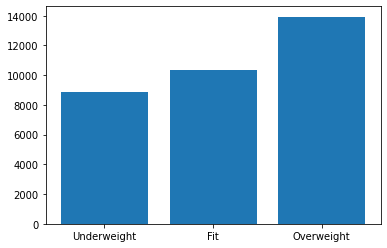

In [38]:
# import matplotlib.pyplot as plt
x = ['Underweight', 'Fit', 'Overweight']
y = [8852, 10379, 13937]
plt.bar(x, y)
plt.show()

In [39]:
# 13. Draw line plot of expenditure against age and BMI

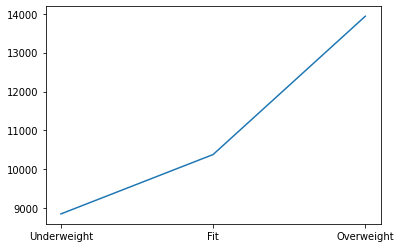

In [40]:
x = ['Underweight', 'Fit', 'Overweight']
y = [df_underweight['expenditure'].mean(), df_fit['expenditure'].mean(), df_overweight['expenditure'].mean()]
plt.plot(x, y)
plt.show()

In [41]:
 # 14. Draw a bar chart to show zone wise average expenditure

In [42]:
df_emp_health.groupby('zone')['expenditure'].mean()

zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64

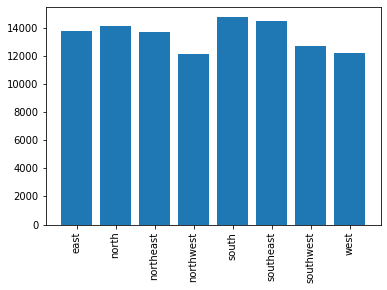

In [43]:
x = ['east', 'north', 'northeast', 'northwest', 'south', 'southeast', 'southwest', 'west']
y = [13774, 14102, 13694, 12151, 14715, 14452, 12717, 12182]
plt.xticks(rotation = 90)
plt.bar(x, y)
plt.show()

In [44]:
# 15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

In [45]:
df_emp_health_copy = df_emp_health.copy()
df_smoker = df_emp_health_copy[df_emp_health_copy['smoke'] != 'no'] 

df_emp_health_copy = df_emp_health.copy()
df_alcoholic = df_emp_health_copy[df_emp_health_copy['alcohol'] != 'no'] 

In [46]:
print('The average expenditure for a smoker is:', round(df_smoker['expenditure'].mean()))
print('The average expenditure for a non-smoker is:', round(df_non_smoker['expenditure'].mean()))
print('The average expenditure for a alcoholic is:', round(df_alcoholic['expenditure'].mean()))
print('The average expenditure for a non-alcoholic is:', round(df_non_alcoholic['expenditure'].mean()))
print('The average expenditure for a non-smoking, non-alcoholic is:', round(df_non_smoking_alcoholic['expenditure_x'].mean()))

The average expenditure for a smoker is: 32050
The average expenditure for a non-smoker is: 8087
The average expenditure for a alcoholic is: 13029
The average expenditure for a non-alcoholic is: 14277
The average expenditure for a non-smoking, non-alcoholic is: 8036


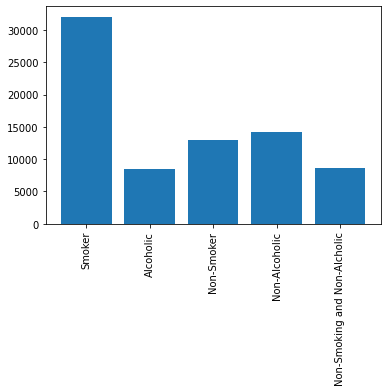

In [47]:
x = ['Smoker', 'Alcoholic', 'Non-Smoker', 'Non-Alcoholic', 'Non-Smoking and Non-Alcholic']
y = [32050, 8434, 13029, 14277, 8629]
plt.xticks(rotation=90)
plt.bar(x, y)
plt.show()

In [48]:
# 16. Draw pie chart for alcohol consumption habits

In [49]:
df_emp_health.groupby('alcohol')['id'].count()

alcohol
daily      395
no         259
party      278
rarely      59
weekend    347
Name: id, dtype: int64

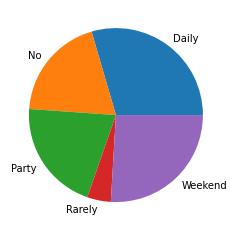

In [50]:
y = [395, 259, 278, 59, 347]
mylabels = ["Daily", "No", "Party", "Rarely", "Weekend"]

plt.pie(y, labels = mylabels)
plt.show()

In [51]:
 # 17. Draw scatter plot to see the relation between age and expenditure, keep smoking habit as hue

<AxesSubplot:xlabel='age', ylabel='expenditure'>

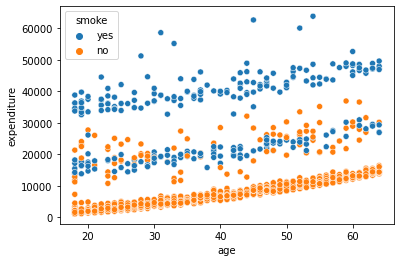

In [52]:
sns.scatterplot(data = df_emp_health, x = "age", y = "expenditure", hue = 'smoke')

In [53]:
# 18. Draw distribution plot of expenditure

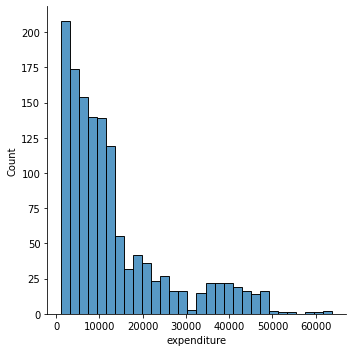

In [54]:
sns.displot(data = df_emp_health, x = 'expenditure')

In [55]:
# 19. Display the pairplot

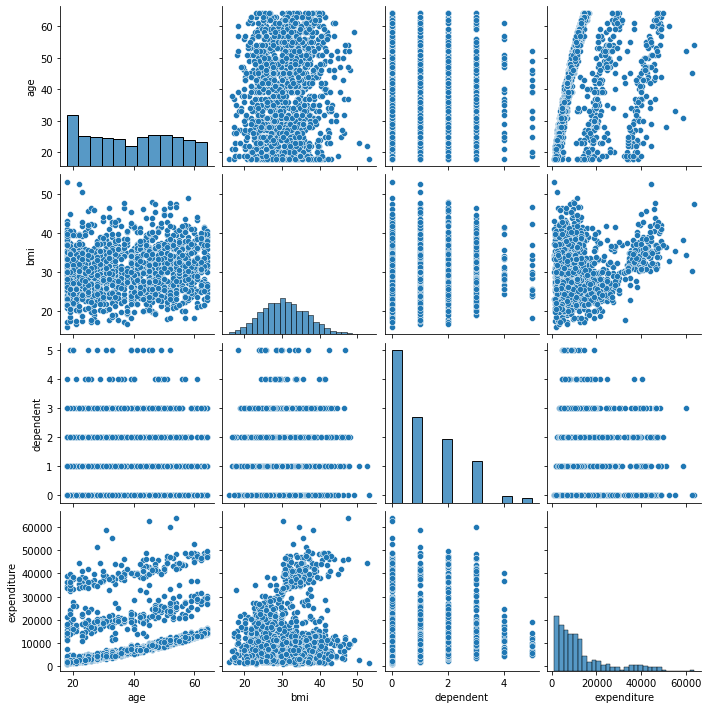

In [56]:
sns.pairplot(data = df_emp_health)

In [57]:
# 20. Display heatmap for the data

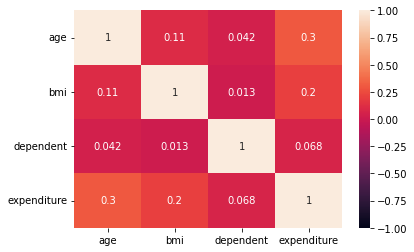

In [58]:
corr_matrix = df_emp_health.corr()
corr_matrix
sns.heatmap(corr_matrix, annot = True, vmin = -1)
plt.show()